## OLS

Based on the book master learning algortihms I'm attempting to implement from scracth with python machine learning algorithms. I'm focusing here on the pseudocode of running the algorithm in some of the pitfall and assumptions the algorithms might have. 

In [365]:
# test data m is 2 and b is 1
data_test = [(x, 2 * x + 1) for x in range(10)]
xs = [x for x, _ in data_test]
ys = [y for _, y in data_test]

First I will attempt to find the regression coeficients via the OLS method.

m = sum((xi - mean(x)) * (yi - mean(y))) / sum(xi - mean(x)) ** 2

b = mean(y) - m * mean(x)

our hypothesis function is 

y = b + m*x

In [366]:
from typing import List, Tuple
import math

Vector = List[float]

def mean (inputs: Vector) -> float:
    """computes the mean of the vector"""
    assert inputs, "cannot compute the mean of an empty vector"
    return sum(inputs)/ len(inputs)

def de_mean(inputs: Vector) -> float:
    """
    substracts the mean of inputs to each element
    """
    mean_inputs = mean(inputs)
    return [input - mean_inputs for input in inputs]

In [367]:
assert -0.001 <mean(de_mean(xs)) < 0.001 # mean should be close to 0

In [368]:
def _slope(xs: Vector, ys: Vector) -> float:
    """computes the slope for OLS simple regression"""
    return sum(xi * yi 
               for xi, yi in zip(de_mean(xs), de_mean(ys))) / sum(xi ** 2 for xi in de_mean(xs))

def _intercept(xs: Vector, ys: Vector) -> float:
    """ computes the intercept term for OLS simple regression"""
    m = _slope(xs, ys)
    return mean(ys) - m * mean(xs)

def ols (xs: Vector, ys: Vector) -> Tuple:
    """ computes and returns the intercept and slope for OLS simple regression"""
    return _intercept(xs, ys), _slope(xs, ys)

In [369]:
b, m = ols(xs, ys)
b, m

(1.0, 2.0)

In [370]:
assert 0.99 < b < 1.01
assert 1.99 < m < 2.01

Now let's add some noise to our data

In [371]:
import random

data = [(x, 2 * x + 1 ) for x in range(100)]
data[:5]

[(0, 1), (1, 3), (2, 5), (3, 7), (4, 9)]

In [372]:
xs = [x for x, _ in data]
ys = [y for _, y in data]
b, m = ols(xs, ys)

b, m

(1.0, 2.0)

In [373]:
# y_hat-  the predict values
def predict(xs:Vector, ys: Vector, b: float, m: float ) -> float:
    return [xi * m + b for xi in xs ]

assert len (predict(xs, ys, b, m)) == len(ys)

In [374]:
# estimating the error
# here we used the root mean squared error

def subtract(v1: Vector, v2: Vector) -> float:
    assert len(v1) == len(v2)
    return [v1_i - v2_i for v1_i, v2_i in zip(v1, v2)]

def root_mean_squared_error(ys: Vector, y_hat: Vector) -> float:
    assert len(ys) == len(y_hat)
    n = len(ys)
    return  math.sqrt(sum(error ** 2 for error in subtract(y_hat, ys)) / n)

In [375]:
y_hat = predict(xs, ys, b, m) # predict values y_hat
root_mean_squared_error(ys, y_hat)

0.0

## Stochastic gradient descent

Now I've ttempted to implement stochastic gradient descent for the same set of data. Stochastic gradient descent is not used to calculate the coeficients for linear regression in
practice unless the dataset prevents traditional Ordinary Least Squares being used (e.g. a
very large dataset). Nevertheless, linear regression does provide a useful exercise for practicing
stochastic gradient descent which is an important algorithm used for minimizing cost functions
by machine learning algorithms.

Each iteration the coefcients, called weights (w) in machine
learning language are updated using the equation:

 w = w  -  alpha * delta 

where delta is: 

delta = derivative (costs) 


Where w is the coefcient or weight being optimized, alpha is a learning rate that you must
configure (e.g. 0.1) and gradient is the error for the model on the training data attributed to
the weight.

Our hypothesis function is:

y = w_0 + w_1 * x

In [376]:
# predict the error per point
def predict_point(x: float, w_0: float = 0.0, w_1: float = 0.0) -> float:
    return w_0 + w_1 * x 

def error_point(x: float, y: float, w_0: float = 0.0 , w_1: float = 0.0) -> float:
    """ Calculates the prediction error at point x"""
    return predict_point(x, w_0, w_1) - y

In [377]:
assert error_point(0, 1) == -1

In [378]:
# calculate the derivatives of the costs for both weights and update 

alpha = 0.01 # set initial learning rate
def _update_w0(x: float, y: float, w_0: float,w_1: float, alpha: float) -> float:
    """Update w0, we will use just the error as the gradient"""
    return w_0 - alpha * error_point(x, y, w_0, w_1)

def _update_w1(x: float, y: float, w_0: float,w_1: float, alpha: float) -> float:
    """Update w1, the error is filtered by the input x that caused it"""
    return w_1 - alpha * error_point(x, y, w_0, w_1) * x

def update_W(x: float, y: float, w_0: float,w_1: float, alpha: float) -> Tuple[float]:
    """ Update w_0 and w_1 in one step"""
    return _update_w0(x, y, w_0, w_1, alpha), _update_w1(x, y, w_0, w_1, alpha)

In [379]:
w_0, w_1 = (0, 0) # test only
assert update_W(1, 1, w_0, w_1, 0.01) == (0.01, 0.01)

In [380]:
import itertools

In [381]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot_error(data: List[Tuple[int, float]]) -> None:
    """ Plots error vs epoch """
    
    epochs = [epoch for epoch, _ in data]
    errors = [error for _, error in data]
    
    plt.plot(epochs, errors , color='green', marker='o', linestyle='solid')
    # add a title
    plt.title("error vs epoch")
    # add a label to the x and y-axis
    plt.ylabel("error")
    plt.xlabel("epoch")
    plt.show()
    return None

In [382]:
def stochastic_gradient_descent(data: List[Vector], alpha: float,  epochs: int = 20) -> Tuple[float]:
    """update of vectors weights w_0 and w_1 with stochastic gradient descent"""
    
    w_0, w_1 = (0, 0) # initialize W randomly
    # in this case random data does not converge with stochastic gradient descent   
    data_gen = itertools.cycle(data) 
    errors = []
    for epoch in range(epochs):
        x, y = next(data_gen)
        w_0, w_1 = update_W(x, y, w_0,w_1, alpha)
        errors.append((epoch, error_point(x, y, w_0, w_1)))
    plot_error(errors)
    return w_0, w_1


In [383]:
b, m

(1.0, 2.0)

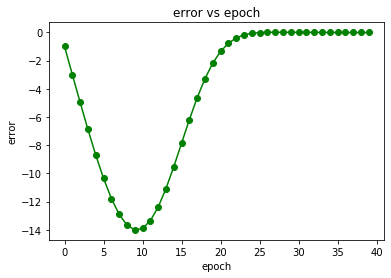

(0.19924323545682285, 2.0203437326961264)

In [384]:
# 30 epochs seem the best value
stochastic_gradient_descent(data, alpha = 0.001, epochs= 40)

Batch gradient descent

In [385]:
data[:4]

[(0, 1), (1, 3), (2, 5), (3, 7)]

In [386]:
def subtract(v1: Vector, v2: Vector) -> Vector:
    """Subtracts 2 vectors of equal length"""
    assert len(v1) == len(v2)
    return [v1_i - v2_i for v1_i, v2_i in zip(v1, v2)]

assert subtract([1, 2], [1, 2]) == [0, 0]

def scalar_multiply(s: float, v1: Vector) -> Vector:
    return [v1_i * s for v1_i in v1]

assert scalar_multiply(0, [1, 2]) == [0, 0]

def vector_sum(inputs: List[Vector]) -> float:
    """sum the ith element of each input vector"""
    l = len(inputs[0])
    assert all(len(vector) == l for vector in inputs), " All vectors lenghts must be the same"
    return [sum(vector[i] for vector in inputs) for i in range(l)]

In [387]:
def _gradient_1(x: int, y: int, w_0: float, w_1: float) -> float:
    """Calculates the gradient update for 1 point for theta 1 param"""
    return error_point(x, y, w_0, w_1) *  x

def _gradient_0(x: int, y: int, w_0: float, w_1: float) -> float:
    """Calculates the gradient update for 1 point for theta 1 param"""
    return error_point(x, y, w_0, w_1)

def gradient_point(x: int, y: int, w_0: float, w_1: float) -> Vector:
    return [_gradient_0(x, y, w_0, w_1), _gradient_1(x, y, w_0, w_1)]

def gradient_step(inputs: Tuple, w_0: float, w_1: float, alpha: float) -> Vector:
    l = len(inputs)
    return scalar_multiply(alpha,
                           scalar_multiply(1/l, 
                           vector_sum([gradient_point(x, y, w_0, w_1) for x, y in inputs]))
                          )



In [388]:
def batch_gradient_descent(data: List[Vector], alpha: float,  epochs: int = 20) -> Tuple[float]:
    """update of vectors weights w_0 and w_1 with batch gradient descent"""
    
    w_0, w_1 = (random.random(), random.random()) # initialize W randomly
    for epoch in range(epochs):
        gradient = gradient_step(data, w_0, w_1, alpha)
        w_0, w_1 = subtract([w_0, w_1], gradient)        
    return w_0, w_1

In [389]:
w_0, w_1 = batch_gradient_descent(data, 0.001, 10)
w_0, w_1
# y_hat = predict(xs, ys, w_0, w_1)
# root_mean_squared_error(ys, y_hat)

(-92.73491796969607, -6210.136540110594)